# Titanic Survival Prediction - Data Cleaning
# ============================================

# ## 📋 Objective
# Clean and prepare the Titanic dataset for modeling:
# - Handle missing values (Age: 19.9%, Cabin: 77.1%, Embarked: 0.2%)
# - Detect and treat outliers
# - Remove irrelevant variables
# - Validate data consistency
# - Create clean dataset for feature engineering

## 1. Library Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Helper functions
import sys
import os
sys.path.append('../src')
from utils.helpers import save_current_plot

In [2]:
# Configuration
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## 2. Data Loading and Backup

In [3]:
# Load original dataset
df_original = pd.read_csv("../data/raw/titanic.csv")
df = df_original.copy()  # Working copy

print("🚢 DATA CLEANING STARTED")
print("=" * 40)
print(f"📊 Original dataset: {df.shape}")
print(f"👥 Total records: {len(df)}")

# Original data backup
print("💾 Creating backup of original data...")

🚢 DATA CLEANING STARTED
📊 Original dataset: (891, 12)
👥 Total records: 891
💾 Creating backup of original data...


## 3. Initial Data Quality Analysis


🔍 DATA QUALITY ANALYSIS
Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

❌ DETAILED MISSING VALUES:
                  Column  Missing_Count  Missing_Percentage Data_Type
Cabin              Cabin            687               77.10    object
Age                  Age 

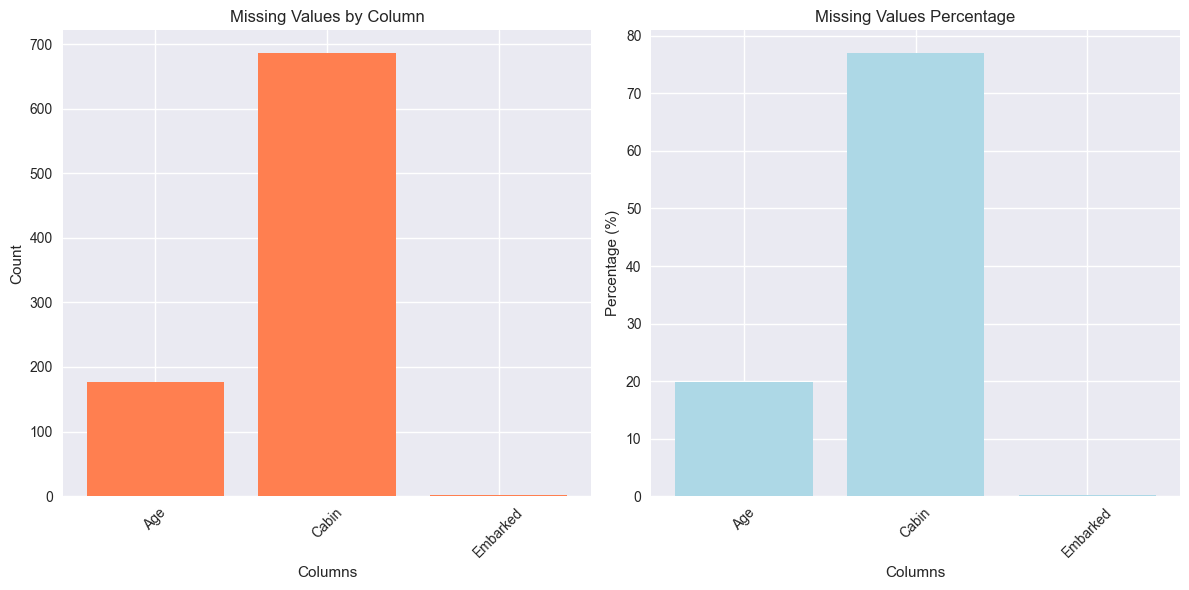

In [4]:
print("\n🔍 DATA QUALITY ANALYSIS")
print("=" * 35)

# General information
print("Dataset information:")
print(df.info())

# Missing values
print("\n❌ DETAILED MISSING VALUES:")
missing_analysis = pd.DataFrame(
    {
        "Column": df.columns,
        "Missing_Count": df.isnull().sum(),
        "Missing_Percentage": (df.isnull().sum() / len(df) * 100).round(2),
        "Data_Type": df.dtypes,
    }
)
missing_analysis = missing_analysis.sort_values("Missing_Count", ascending=False)
print(missing_analysis)

# Visualize missing values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
missing_data = df.isnull().sum()
missing_data_filtered = missing_data[missing_data > 0]
plt.bar(missing_data_filtered.index, missing_data_filtered.values, color="coral")
plt.title("Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
missing_percentage = missing_data / len(df) * 100
missing_percentage_filtered = missing_percentage[missing_percentage > 0]
plt.bar(
    missing_percentage_filtered.index,
    missing_percentage_filtered.values,
    color="lightblue",
)
plt.title("Missing Values Percentage")
plt.xlabel("Columns")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 4. Variable-Specific Cleaning Strategy

In [5]:
print("\n🎯 CLEANING STRATEGY")
print("=" * 30)


🎯 CLEANING STRATEGY


### 4.1 Variables to Remove

In [6]:
print("🗑️ REMOVING IRRELEVANT VARIABLES:")

# Variables identified as non-predictive in EDA
columns_to_drop = ["PassengerId", "Name", "Ticket"]

print(f"Variables to remove: {columns_to_drop}")
print("Reasons:")
print("- PassengerId: Unique identifier, no predictive value")
print("- Name: Personal information, will extract titles separately")
print("- Ticket: Alphanumeric code with no clear pattern")

# Remove variables
df_clean = df.drop(columns=columns_to_drop)
print(f"✅ Variables removed. New dimensions: {df_clean.shape}")

🗑️ REMOVING IRRELEVANT VARIABLES:
Variables to remove: ['PassengerId', 'Name', 'Ticket']
Reasons:
- PassengerId: Unique identifier, no predictive value
- Name: Personal information, will extract titles separately
- Ticket: Alphanumeric code with no clear pattern
✅ Variables removed. New dimensions: (891, 9)


### 4.2 Handling Cabin Variable (77.1% missing)


🏠 HANDLING CABIN VARIABLE:
Missing values: 687 (77.1%)
Records with cabin: 204
Records without cabin: 687

Survival by cabin availability:
Survived       0    1  All
Cabin_Known               
0            481  206  687
1             68  136  204
All          549  342  891

Percentages:
Survived        0     1
Cabin_Known            
0            70.0  30.0
1            33.3  66.7
✅ Graph saved: ../results/figures/eda_plots\cabin_analysis.png


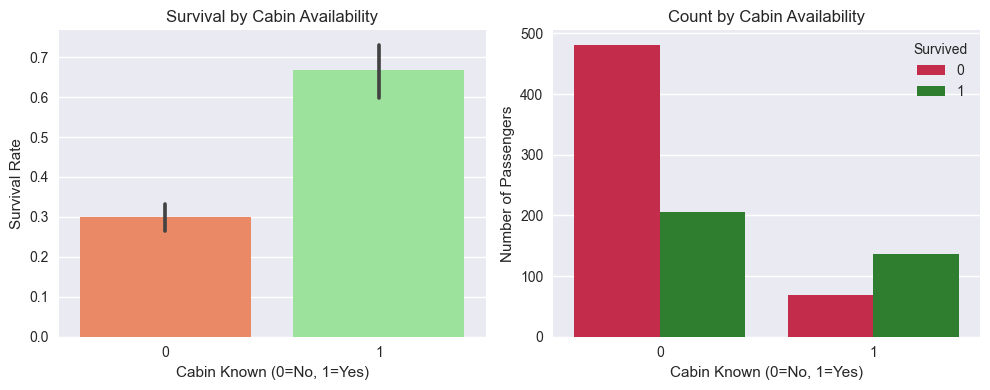

✅ Cabin variable replaced with Cabin_Known (binary)


In [7]:
print("\n🏠 HANDLING CABIN VARIABLE:")
print(
    f"Missing values: {df_clean['Cabin'].isnull().sum()} ({df_clean['Cabin'].isnull().mean()*100:.1f}%)"
)

# Analyze cabin patterns
cabin_available = df_clean["Cabin"].notna()
print(f"Records with cabin: {cabin_available.sum()}")
print(f"Records without cabin: {(~cabin_available).sum()}")

# Create binary variable: had cabin assigned or not
df_clean["Cabin_Known"] = cabin_available.astype(int)

# Analyze survival by cabin availability
cabin_survival = pd.crosstab(
    df_clean["Cabin_Known"], df_clean["Survived"], margins=True
)
print("\nSurvival by cabin availability:")
print(cabin_survival)

cabin_survival_pct = (
    pd.crosstab(df_clean["Cabin_Known"], df_clean["Survived"], normalize="index") * 100
)
print("\nPercentages:")
print(cabin_survival_pct.round(1))

# Visualization
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.barplot(
    data=df_clean, x="Cabin_Known", y="Survived", palette=["coral", "lightgreen"]
)
plt.title("Survival by Cabin Availability")
plt.xlabel("Cabin Known (0=No, 1=Yes)")
plt.ylabel("Survival Rate")

plt.subplot(1, 2, 2)
sns.countplot(
    data=df_clean, x="Cabin_Known", hue="Survived", palette=["crimson", "forestgreen"]
)
plt.title("Count by Cabin Availability")
plt.xlabel("Cabin Known (0=No, 1=Yes)")
plt.ylabel("Number of Passengers")

plt.tight_layout()
save_current_plot("cabin_analysis", "../results/figures/eda_plots")
plt.show()


# Remove original Cabin variable
df_clean = df_clean.drop("Cabin", axis=1)
print("✅ Cabin variable replaced with Cabin_Known (binary)")

### 4.3 Handling Embarked Variable (0.2% missing)


⚓ HANDLING EMBARKED VARIABLE:
Missing values: 2 (0.2%)

Records with missing Embarked:
     Pclass     Sex   Age  Fare  Survived
61        1  female  38.0  80.0         1
829       1  female  62.0  80.0         1

Port distribution:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Most frequent port: S (644 passengers)
✅ Missing values imputed with mode: 'S'
Verification - Missing Embarked after: 0

👶👴 HANDLING AGE VARIABLE:
Missing values: 177 (19.9%)

Age statistics (non-null values):
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Age missing patterns by other variables:

By gender:
Age     False  True  All
Sex                     
female    261    53  314
male      453   124  577
All       714   177  891

By class:
Age     False  True  All
Pclass                  
1         186    30  216
2         173    11  184
3         355   13

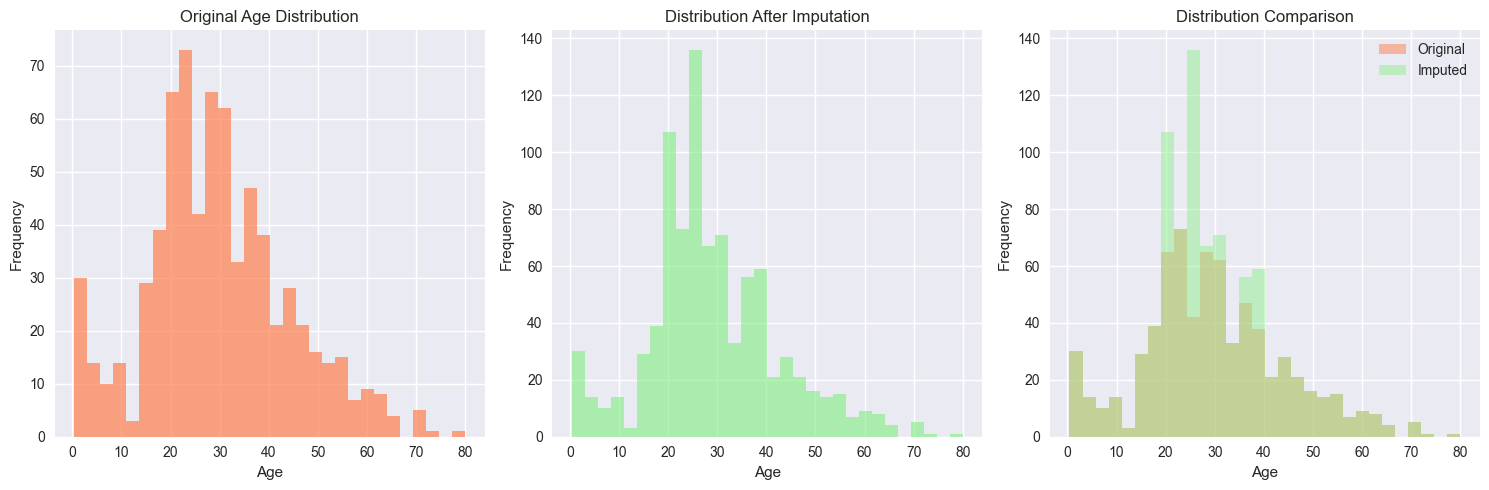

In [8]:
print("\n⚓ HANDLING EMBARKED VARIABLE:")
print(
    f"Missing values: {df_clean['Embarked'].isnull().sum()} ({df_clean['Embarked'].isnull().mean()*100:.1f}%)"
)

# Analyze records with missing Embarked
missing_embarked = df_clean[df_clean["Embarked"].isnull()]
print("\nRecords with missing Embarked:")
print(missing_embarked[["Pclass", "Sex", "Age", "Fare", "Survived"]])

# Port distribution
embarked_counts = df_clean["Embarked"].value_counts()
print(f"\nPort distribution:")
print(embarked_counts)
print(
    f"Most frequent port: {embarked_counts.index[0]} ({embarked_counts.iloc[0]} passengers)"
)

# Impute with mode (Southampton - S)
mode_embarked = df_clean["Embarked"].mode()[0]
df_clean["Embarked"].fillna(mode_embarked, inplace=True)

print(f"✅ Missing values imputed with mode: '{mode_embarked}'")
print(
    f"Verification - Missing Embarked after: {df_clean['Embarked'].isnull().sum()}"
)

# ### 4.4 Handling Age Variable (19.9% missing)

print("\n👶👴 HANDLING AGE VARIABLE:")
print(
    f"Missing values: {df_clean['Age'].isnull().sum()} ({df_clean['Age'].isnull().mean()*100:.1f}%)"
)

# Basic Age statistics
print("\nAge statistics (non-null values):")
print(df_clean["Age"].describe())

# Analyze Age missing patterns
age_missing = df_clean["Age"].isnull()
print(f"\nAge missing patterns by other variables:")

# By gender
age_missing_by_sex = pd.crosstab(df_clean["Sex"], age_missing, margins=True)
print("\nBy gender:")
print(age_missing_by_sex)

# By class
age_missing_by_class = pd.crosstab(df_clean["Pclass"], age_missing, margins=True)
print("\nBy class:")
print(age_missing_by_class)

# Imputation strategy: median by group (Sex + Pclass)
print("\n🔧 IMPUTATION STRATEGY:")
print("Using group median (Sex + Pclass)")

# Calculate group medians
age_medians = df_clean.groupby(["Sex", "Pclass"])["Age"].median()
print("\nGroup medians:")
print(age_medians)


# Imputation function
def impute_age(row):
    if pd.isnull(row["Age"]):
        return age_medians[row["Sex"], row["Pclass"]]
    return row["Age"]


# Apply imputation
df_clean["Age"] = df_clean.apply(impute_age, axis=1)

print(f"✅ Age imputed. Missing values after: {df_clean['Age'].isnull().sum()}")

# Visualize distribution before and after
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df_original["Age"].hist(bins=30, alpha=0.7, color="coral", label="Original")
plt.title("Original Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
df_clean["Age"].hist(
    bins=30, alpha=0.7, color="lightgreen", label="After Imputation"
)
plt.title("Distribution After Imputation")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
df_original["Age"].hist(bins=30, alpha=0.5, color="coral", label="Original")
df_clean["Age"].hist(bins=30, alpha=0.5, color="lightgreen", label="Imputed")
plt.title("Distribution Comparison")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
save_current_plot("age_imputation_comparison", "../results/figures/eda_plots")
plt.show()

## 5. Outlier Detection and Treatment


🎯 OUTLIER DETECTION

Age:
  Outliers detected: 33 (3.7%)
  Normal range: [-0.25, 57.75]
  Outlier values: [np.float64(58.0), np.float64(59.0), np.float64(60.0), np.float64(61.0), np.float64(62.0), np.float64(63.0), np.float64(64.0), np.float64(65.0), np.float64(66.0), np.float64(70.0), np.float64(70.5), np.float64(71.0), np.float64(74.0), np.float64(80.0)]

SibSp:
  Outliers detected: 46 (5.2%)
  Normal range: [-1.50, 2.50]
  Outlier values: [np.int64(3), np.int64(4), np.int64(5), np.int64(8)]

Parch:
  Outliers detected: 213 (23.9%)
  Normal range: [0.00, 0.00]
  Outlier values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]

Fare:
  Outliers detected: 116 (13.0%)
  Normal range: [-26.72, 65.63]
  Outlier values: [np.float64(66.6), np.float64(69.3), np.float64(69.55), np.float64(71.0), np.float64(71.2833), np.float64(73.5), np.float64(75.25), np.float64(76.2917), np.float64(76.7292), np.float64(77.2875), np.float64(77.9583), np.float64(78.2667), np.flo

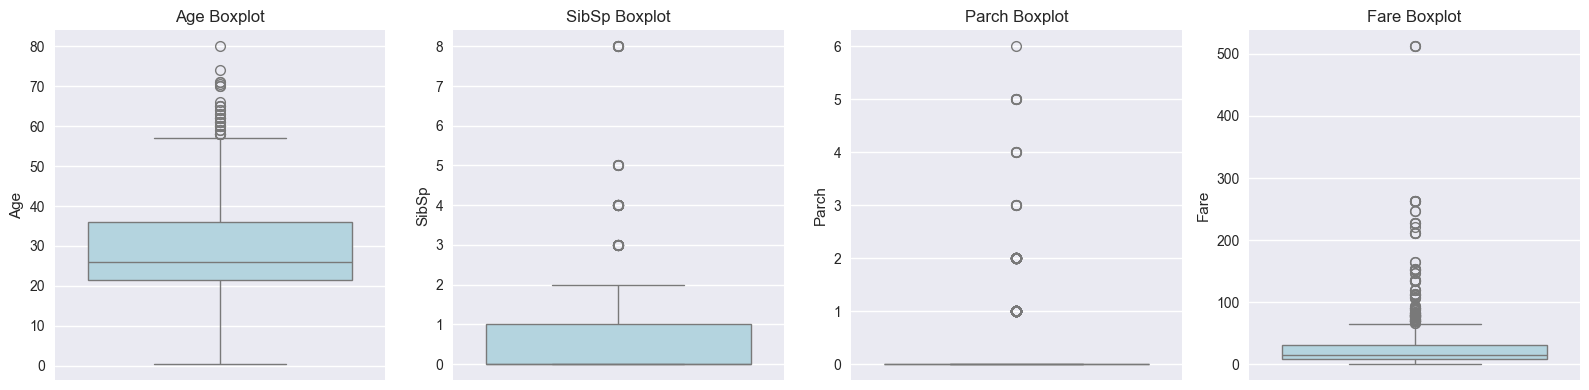

In [9]:
print("\n🎯 OUTLIER DETECTION")
print("=" * 25)

# Numeric variables for outlier analysis
numeric_vars = ["Age", "SibSp", "Parch", "Fare"]


def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


# Outlier analysis by variable
outliers_summary = {}

for var in numeric_vars:
    outliers, lower, upper = detect_outliers_iqr(df_clean, var)
    outliers_summary[var] = {
        "count": len(outliers),
        "percentage": len(outliers) / len(df_clean) * 100,
        "lower_bound": lower,
        "upper_bound": upper,
    }

    print(f"\n{var}:")
    print(
        f"  Outliers detected: {len(outliers)} ({len(outliers)/len(df_clean)*100:.1f}%)"
    )
    print(f"  Normal range: [{lower:.2f}, {upper:.2f}]")
    if len(outliers) > 0:
        print(f"  Outlier values: {sorted(outliers[var].unique())}")

# Outlier visualization
plt.figure(figsize=(16, 4))

for i, var in enumerate(numeric_vars, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(data=df_clean, y=var, color="lightblue")
    plt.title(f"{var} Boxplot")

plt.tight_layout()
save_current_plot("outliers_detection", "../results/figures/eda_plots")
plt.show()

5.1 Specific Outlier Treatment

In [10]:
print("\n🔧 OUTLIER TREATMENT:")

# Fare: Analyze extreme outliers
fare_outliers, _, fare_upper = detect_outliers_iqr(df_clean, "Fare")
print(f"\nFare - Outliers above ${fare_upper:.2f}:")
extreme_fare = df_clean[df_clean["Fare"] > fare_upper].sort_values(
    "Fare", ascending=False
)
print(extreme_fare[["Pclass", "Sex", "Age", "Fare", "Survived"]].head())

# Decision: Keep Fare outliers (could be legitimate - luxury suites)
print("✅ Decision: Keep Fare outliers (possible luxury suites)")

# Age: Verify extreme ages
age_outliers, age_lower, age_upper = detect_outliers_iqr(df_clean, "Age")
print(f"\nAge - Outliers:")
print(f"Below {age_lower:.1f} years: {len(df_clean[df_clean['Age'] < age_lower])}")
print(f"Above {age_upper:.1f} years: {len(df_clean[df_clean['Age'] > age_upper])}")

extreme_ages = df_clean[(df_clean["Age"] < age_lower) | (df_clean["Age"] > age_upper)]
print("\nExtreme ages:")
print(extreme_ages[["Sex", "Age", "Pclass", "Survived"]].sort_values("Age"))

# Decision: Keep Age outliers (infants and elderly are realistic in 1912)
print("✅ Decision: Keep Age outliers (demographically realistic)")

# SibSp and Parch: Large families
sibsp_outliers = df_clean[df_clean["SibSp"] > 3]
parch_outliers = df_clean[df_clean["Parch"] > 3]

print(f"\nLarge families:")
print(f"SibSp > 3: {len(sibsp_outliers)} families")
print(f"Parch > 3: {len(parch_outliers)} families")

# Decision: Keep (large families were common in 1912)
print("✅ Decision: Keep large families (historically valid)")


🔧 OUTLIER TREATMENT:

Fare - Outliers above $65.63:
     Pclass     Sex   Age      Fare  Survived
258       1  female  35.0  512.3292         1
737       1    male  35.0  512.3292         1
679       1    male  36.0  512.3292         1
27        1    male  19.0  263.0000         0
341       1  female  24.0  263.0000         1
✅ Decision: Keep Fare outliers (possible luxury suites)

Age - Outliers:
Below -0.2 years: 0
Above 57.8 years: 33

Extreme ages:
        Sex   Age  Pclass  Survived
11   female  58.0       1         1
195  female  58.0       1         1
268  female  58.0       1         1
487    male  58.0       1         0
659    male  58.0       1         0
94     male  59.0       3         0
232    male  59.0       2         0
366  female  60.0       1         1
587    male  60.0       1         1
684    male  60.0       2         0
694    male  60.0       1         0
625    male  61.0       1         0
326    male  61.0       3         0
170    male  61.0       1         0
25

## 6. Consistency Validation

In [11]:
print("\n✅ CONSISTENCY VALIDATION")
print("=" * 30)

# Verify variable ranges
consistency_checks = {
    "Age": (df_clean["Age"] >= 0) & (df_clean["Age"] <= 120),
    "Fare": df_clean["Fare"] >= 0,
    "SibSp": df_clean["SibSp"] >= 0,
    "Parch": df_clean["Parch"] >= 0,
    "Pclass": df_clean["Pclass"].isin([1, 2, 3]),
    "Sex": df_clean["Sex"].isin(["male", "female"]),
    "Embarked": df_clean["Embarked"].isin(["C", "Q", "S"]),
    "Survived": df_clean["Survived"].isin([0, 1]),
}

print("Consistency check:")
for var, check in consistency_checks.items():
    inconsistent = (~check).sum()
    print(f"  {var}: {inconsistent} inconsistent values")
    if inconsistent > 0:
        print(f"    Problematic values: {df_clean[~check][var].unique()}")


✅ CONSISTENCY VALIDATION
Consistency check:
  Age: 0 inconsistent values
  Fare: 0 inconsistent values
  SibSp: 0 inconsistent values
  Parch: 0 inconsistent values
  Pclass: 0 inconsistent values
  Sex: 0 inconsistent values
  Embarked: 0 inconsistent values
  Survived: 0 inconsistent values


## 7. Final Clean Dataset Verification

In [12]:
print("\n🏁 CLEAN DATASET - FINAL VERIFICATION")
print("=" * 40)

print("📊 Final dimensions:")
print(f"  Original: {df_original.shape}")
print(f"  Clean: {df_clean.shape}")
print(f"  Rows removed: {len(df_original) - len(df_clean)}")
print(f"  Columns removed: {len(df_original.columns) - len(df_clean.columns)}")

print("\n📋 Clean dataset information:")
print(df_clean.info())

print("\n❌ Final missing values check:")
final_missing = df_clean.isnull().sum()
print(final_missing[final_missing > 0])

if final_missing.sum() == 0:
    print("✅ Perfect! No missing values remain")
else:
    print("⚠️ There are still missing values to handle")

print("\n📈 Final descriptive statistics:")
print(df_clean.describe())


🏁 CLEAN DATASET - FINAL VERIFICATION
📊 Final dimensions:
  Original: (891, 12)
  Clean: (891, 9)
  Rows removed: 0
  Columns removed: 3

📋 Clean dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   Cabin_Known  891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None

❌ Final missing values check:
Series([], dtype: int64)
✅ Perfect! No missing values remain

📈 Final descriptive statistics:
         Survived      Pclass         Age       SibSp       Parch        F

## 8. Summary of Changes Made

In [13]:
print("\n📝 DATA CLEANING SUMMARY")
print("=" * 35)

changes_summary = {
    "Removed variables": ["PassengerId", "Name", "Ticket"],
    "Cabin": "Converted to binary variable 'Cabin_Known'",
    "Embarked": "2 missing values imputed with mode ('S')",
    "Age": "177 missing values imputed with group median (Sex + Pclass)",
    "Outliers": "Detected but kept (historically valid)",
    "New variables": ["Cabin_Known"],
    "Final variables": len(df_clean.columns),
    "Final records": len(df_clean),
}

for key, value in changes_summary.items():
    print(f"✅ {key}: {value}")


📝 DATA CLEANING SUMMARY
✅ Removed variables: ['PassengerId', 'Name', 'Ticket']
✅ Cabin: Converted to binary variable 'Cabin_Known'
✅ Embarked: 2 missing values imputed with mode ('S')
✅ Age: 177 missing values imputed with group median (Sex + Pclass)
✅ Outliers: Detected but kept (historically valid)
✅ New variables: ['Cabin_Known']
✅ Final variables: 9
✅ Final records: 891


## 9. Save Clean Dataset

In [14]:
print("\n💾 SAVING CLEAN DATASET")
print("=" * 28)

# Save to data/processed/
output_path = "../data/processed/train_processed.csv"
df_clean.to_csv(output_path, index=False)

print(f"✅ Clean dataset saved to: {output_path}")
print(f"📊 File saved: {df_clean.shape[0]} rows × {df_clean.shape[1]} columns")

# Verify successful save
df_verify = pd.read_csv(output_path)
print(f"🔍 Verification: file read successfully ({df_verify.shape})")


💾 SAVING CLEAN DATASET
✅ Clean dataset saved to: ../data/processed/train_processed.csv
📊 File saved: 891 rows × 9 columns
🔍 Verification: file read successfully ((891, 9))


## 10. Next Steps

In [15]:
print("\n🚀 NEXT STEPS")
print("=" * 18)

next_steps = [
    "Feature Engineering (03_feature_engineering.ipynb)",
    "- Create FamilySize variable (SibSp + Parch + 1)",
    "- Extract titles from names (Mr, Mrs, Miss, Master, etc.)",
    "- Create age categories (Child, Adult, Senior)",
    "- Create fare bins (Low, Medium, High, Premium)",
    "- Categorical variable encoding",
    "- Numeric variable scaling",
    "Modeling (04_modeling.ipynb)",
    "- Split train/validation/test",
    "- Implement algorithms: Logistic Regression, Random Forest, SVM, Naive Bayes",
    "- Cross-validation and hyperparameter tuning",
]

for i, step in enumerate(next_steps, 1):
    if step.startswith("-"):
        print(f"  {step}")
    else:
        print(f"{i}. {step}")

print("\n✅ Data cleaning completed successfully!")
print("📊 Dataset ready for Feature Engineering")


🚀 NEXT STEPS
1. Feature Engineering (03_feature_engineering.ipynb)
  - Create FamilySize variable (SibSp + Parch + 1)
  - Extract titles from names (Mr, Mrs, Miss, Master, etc.)
  - Create age categories (Child, Adult, Senior)
  - Create fare bins (Low, Medium, High, Premium)
  - Categorical variable encoding
  - Numeric variable scaling
8. Modeling (04_modeling.ipynb)
  - Split train/validation/test
  - Implement algorithms: Logistic Regression, Random Forest, SVM, Naive Bayes
  - Cross-validation and hyperparameter tuning

✅ Data cleaning completed successfully!
📊 Dataset ready for Feature Engineering
